# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle files:
  <ul>
    <li>As requested in Q2.a and Q3.a</li>
  </ul>
</li>
<li> PY file:
  <ul>
   <li> As requested in Q3.a</li>
   </ul>
   </li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:

$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
Let's assume that $$i=k:$$

$$\frac{\partial softmax(x)_i}{\partial x_k} = \frac{\partial \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}}{\partial x_k} = \frac{e^{x_k} \cdot \sum_{j=1}^{N} e^{x_j} - e^{x_k \cdot 2}}{({\sum_{j=1}^{N} e^{x_j}})^2} \\= \frac{e^{x_k}\cdot({\sum_{j=1}^{N} e^{x_j}} - e^{x_k})}{({\sum_{j=1}^{N} e^{x_j}})^2} = softmax(x)_k \cdot (1 - softmax(x)_k)$$

Else $$i\neq j:$$

$$\frac{\partial softmax(x)_i}{\partial x_k} = \frac{\partial \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}}{\partial x_k} = \frac{0 - e^{x_k} \cdot e^{x_i}}{(\sum_{j=1}^{N} e^{x_j})^2} \\= - softmax(x)_k \cdot softmax(x)_i$$

## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$
\frac{\partial}{\partial \theta} CE(y, \hat{y}) = -\frac{\partial}{\partial \theta} \sum_i y_i \log(\hat{y}_i) = 
- \frac{\partial}{\partial \theta} \sum_i y_i \log(\text{softmax}(\theta)_i) 
= -\sum_i y_i \frac{\partial}{\partial \theta} \log(\text{softmax}(\theta)_i)
= -\sum_i \frac{y_i}{\text{softmax}(\theta)_i} \cdot \frac{\partial}{\partial \theta} \text{softmax}(\theta)_i
$$

Where:

$$
\frac{\partial}{\partial \theta_j} \text{softmax}(\theta)_i =
\begin{cases}
\text{softmax}(\theta)_i \cdot \left(1 - \text{softmax}(\theta)_i\right), & \text{if } i = j \\
-\text{softmax}(\theta)_i \cdot \text{softmax}(\theta)_j, & \text{if } i \neq j
\end{cases}
$$



# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [1]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [2]:
def d_sigmoid(x):
    return torch.exp(-x) / (1 + torch.exp(-x))**2


def d_tanh(x):
    return 1 - torch.div((torch.exp(x) - torch.exp(-x))**2, (torch.exp(x) + torch.exp(-x))**2)

def d_softmax(x):
    s = softmax(x)
    if len(x.shape) == 1:
        return torch.diag(s) - torch.outer(s, s)
    else:
        return torch.diag_embed(s) - torch.bmm(s.unsqueeze(-1), s.unsqueeze(1))

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the forward and backward passes of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt

In [4]:
# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [5]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

In [6]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activation=sigmoid, d_activation=d_sigmoid, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function and its derivative
        self.activation = activation
        self.d_activation = d_activation
        
        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr


    def forward(self, X):
        """Forward pass."""
        self.z1 = torch.matmul(X, self.W1) + self.b1  # Linear transformation
        self.h = self.activation(self.z1)  # Activation (hidden layer)
        self.z2 = torch.matmul(self.h, self.W2) + self.b2  # Linear transformation
        return softmax(self.z2) 

    def backward(self, X, y, y_hat):
        """Backward pass to compute gradients"""
        batch_size = y.size(0)

        # Output layer gradients
        dl_dz2 = (y_hat - y) / batch_size  # Cross-entropy derivative
        dl_dW2 = torch.matmul(self.h.T, dl_dz2)
        dl_db2 = dl_dz2.sum(dim=0)

        # Hidden layer gradients
        dl_dh = torch.matmul(dl_dz2, self.W2.T)
        dl_dz1 = dl_dh * self.d_activation(self.z1)
        dl_dW1 = torch.matmul(X.T, dl_dz1)
        dl_db1 = dl_dz1.sum(dim=0)

        # Update weights and biases
        self.W2 -= self.lr * dl_dW2
        self.b2 -= self.lr * dl_db2
        self.W1 -= self.lr * dl_dW1
        self.b1 -= self.lr * dl_db1

    def train(self, X, y):
        """Train the network on a single batch."""
        y_hat = self.forward(X)  # Forward pass
        self.backward(X, y, y_hat)  # Backward pass


In [7]:
def train_model_Q2(model):
    train_losses, train_accuracy = [], []
    test_losses, test_accuracy = [], []
    for i in range(EPOCHS):
        running_loss_train = 0
        correct, total = 0, 0
        running_loss_test = 0
        correct_predictions, total_predictions = 0, 0
        for x, y in train_dataloader:
            # training data:
            x = x.view(x.size(0), -1)
            y_one_hot = one_hot(y, NUM_OF_CLASSES)
            model.train(x, y_one_hot)
            output = model.forward(x)
            loss = cross_entropy(y, output)
            running_loss_train += loss.item()
            _, predicted_train = torch.max(output.data, 1)
            total += y.size(0)
            correct += (predicted_train == y).sum().item()

        epoch_loss_train = running_loss_train / len(train_dataloader)
        epoch_accuracy_train = 100 * correct / total
        train_losses.append(epoch_loss_train)
        train_accuracy.append(epoch_accuracy_train)

        for x, y in test_dataloader:
            with torch.no_grad():
                x = x.view(x.size(0), -1)  # Flatten input if needed
                y_one_hot_test = one_hot(y, NUM_OF_CLASSES)
                output_test = model.forward(x)
                loss_test = cross_entropy(y, output_test)
                running_loss_test += loss_test.item()
                _, predicted_test = torch.max(output_test, dim=1)
                correct_predictions += (predicted_test == y).sum().item()
                total_predictions += y.size(0)

        avg_loss_test = running_loss_test / len(test_dataloader)
        accuracy_test = 100 * correct_predictions / total_predictions
        test_losses.append(avg_loss_test)
        test_accuracy.append(accuracy_test)

        print(f"Epoch {i} Train Loss: {epoch_loss_train:.4f} Train: Accuracy: {epoch_accuracy_train:.2f}, Test Loss: {avg_loss_test:.4f}, Test Acuracy: {accuracy_test:.2f}")
    return train_losses, train_accuracy, test_losses, test_accuracy

In [8]:
lrs = [0.01, 0.05, 0.1]
model_stats = {}
i=0
students_ids = '337604821_340915156'
base_filename = f'HW1_{students_ids}'

for lr in lrs:
    set_seed(SEED)
    model = FullyConnectedNetwork(784, 10, 128, lr=lr)
    print("new model with learning rate of:", lr)
    train_losses, train_accuracy, test_losses, test_accuracy = train_model_Q2(model)
    model_stats[lr] = (train_losses, train_accuracy, test_losses, test_accuracy)
    
    filename = f'{base_filename}_{lr}.pkl'
    torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, filename)

new model with learning rate of: 0.01
Epoch 0 Train Loss: 3.5529 Train: Accuracy: 36.81, Test Loss: 1.8211, Test Acuracy: 56.35
Epoch 1 Train Loss: 1.4797 Train: Accuracy: 62.99, Test Loss: 1.1778, Test Acuracy: 69.16
Epoch 2 Train Loss: 1.0913 Train: Accuracy: 71.23, Test Loss: 0.9392, Test Acuracy: 74.59
Epoch 3 Train Loss: 0.9118 Train: Accuracy: 75.40, Test Loss: 0.8109, Test Acuracy: 77.59
Epoch 4 Train Loss: 0.8039 Train: Accuracy: 77.97, Test Loss: 0.7291, Test Acuracy: 79.61
Epoch 5 Train Loss: 0.7300 Train: Accuracy: 79.88, Test Loss: 0.6715, Test Acuracy: 81.04
Epoch 6 Train Loss: 0.6751 Train: Accuracy: 81.24, Test Loss: 0.6282, Test Acuracy: 82.37
Epoch 7 Train Loss: 0.6321 Train: Accuracy: 82.37, Test Loss: 0.5939, Test Acuracy: 83.14
Epoch 8 Train Loss: 0.5972 Train: Accuracy: 83.24, Test Loss: 0.5659, Test Acuracy: 83.81
Epoch 9 Train Loss: 0.5680 Train: Accuracy: 84.00, Test Loss: 0.5424, Test Acuracy: 84.43
Epoch 10 Train Loss: 0.5432 Train: Accuracy: 84.62, Test Loss:

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

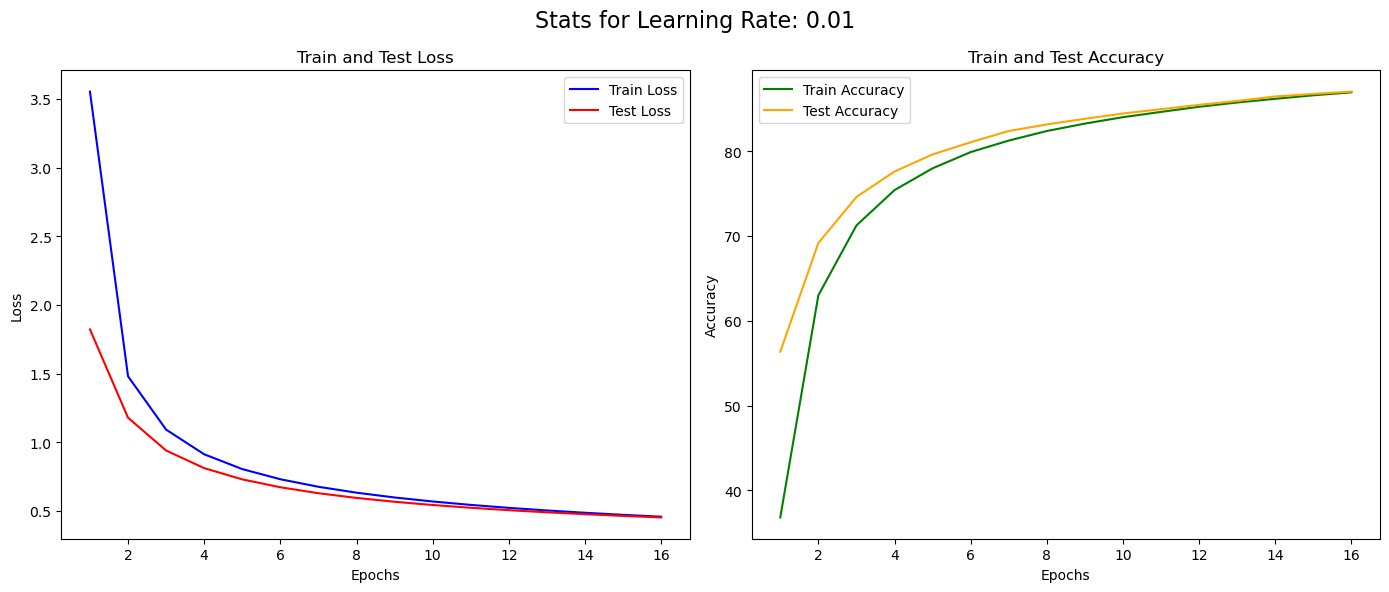

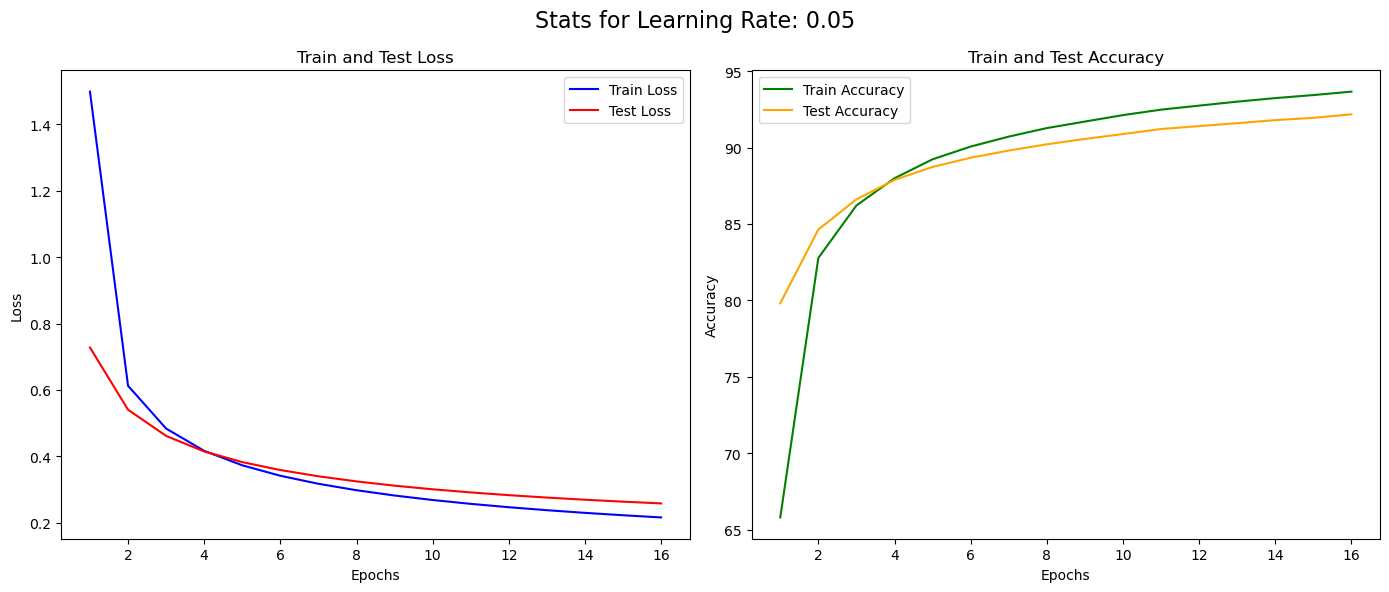

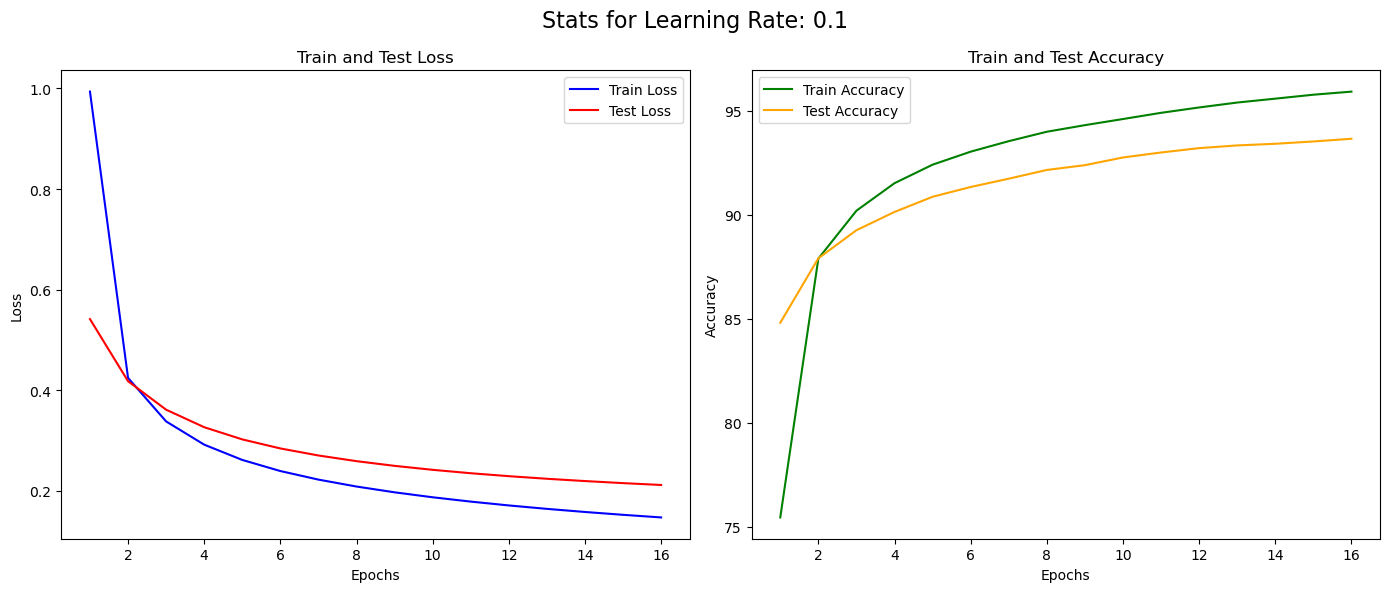

In [9]:
epochs = range(1, len(train_losses) + 1)
for lr, (train_losses, train_accuracy, test_losses, test_accuracy) in model_stats.items():
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    axs[0].plot(epochs, train_losses, label='Train Loss', color='blue')
    axs[0].plot(epochs, test_losses, label='Test Loss', color='red')
    axs[0].set_title('Train and Test Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[1].plot(epochs, train_accuracy, label='Train Accuracy', color='green')
    axs[1].plot(epochs, test_accuracy, label='Test Accuracy', color='orange')
    axs[1].set_title('Train and Test Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    fig.suptitle(f'Stats for Learning Rate: {lr}', fontsize=16)

    plt.tight_layout()
    plt.show()


As we can see, the plots show that higher learning rates lead to a faster descent in loss, enabling the model to converge more quickly - for higher learning rates we get better accuracy on test (on last epochs)

However, this comes at the cost of overfitting, as indicated by the growing gap between training and test loss (as well as accuracy) for higher learning rates. While higher learning rates achieve better test accuracy initially, the train test accuracy gap increases, usually reflecting on poorer generalization. In contrast, lower learning rates converge more slowly but maintain a smaller gap between training and test metrics (lr=0.01), which may result in more stable learning and better generalization for further epochs.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> As you might know, there are many dogs on campus. Sometimes, understanding the emotions of a dog can be challenging, and people might mistakenly try to pet it when it is sad or angry. As a data scientist, you have been asked to assist Technion's students. Your task is to create a "dog emotion classifier.
<br>
Your code should meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
To satisfy your boss, your model must achieve at least 70% accuracy on the test set. Your boss also emphasized that the model will be deployed on smartphones, so it should have a small number of parameters. 25% of your grade for this task will be based on the number of parameters your model uses — fewer parameters will yield a higher grade.</p>

#### Stages
<ol style="font-size: 17px">
<li>Perform a short EDA (Exploratory Data Analysis).</li>
 <li>Train the model and plot its accuracy and loss (for both the training and validation sets) as a function of the epochs.</li>
  <li>Report the test set accuracy.</li>
   <li>Discuss the progress you made and describe your final model.</li>
    </ol>
<br>
 Your data is in <code>hw1_data/dog_emotion</code>.
<br>
Tou can define a custom dataset (as in tutorial 3) or use <code>torchvision.datasets.ImageFolder</code>.

 #### Submission
 <p style="font-size: 17px"> In addition to the code in the notebook, you should submit:
<ul style="font-size: 17px">
<li> a <code>.py</code> file containing your model class.</li>
<li> a <code>.pkl</code> file containing the weight of your model</li>
</ul>

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from model import CNN
import matplotlib.pyplot as plt
import os
from collections import Counter

In [2]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(42)

In [3]:
mus = (0.4785, 0.4509, 0.3911)
sigmas = (0.2281, 0.2223, 0.2189)

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mus, sigmas)
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mus, sigmas)
])

project_path = r'C:/Users/yumif/Desktop/projects/machine_learning_hw/'

train_dataset = dsets.ImageFolder(root=project_path+'ML2/HW1/hw1_data/Dog_Emotion/train', transform=transform_train)
val_dataset = dsets.ImageFolder(root=project_path+'ML2/HW1/hw1_data/Dog_Emotion/val', transform=transform_test)
test_dataset = dsets.ImageFolder(root=project_path+'ML2/HW1/hw1_data/Dog_Emotion/test', transform=transform_test)

In [4]:
# Hyper Parameters
num_epochs = 300
batch_size = 32
learning_rate = 0.0005
decay = 1e-4

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## 1)

--- Dataset size ---
Training set size: 2800
Validation set size: 400
Test set size: 800
--- Classes ---
Classes: ['angry', 'happy', 'relaxed', 'sad']
Class-to-Index Mapping: {'angry': 0, 'happy': 1, 'relaxed': 2, 'sad': 3}


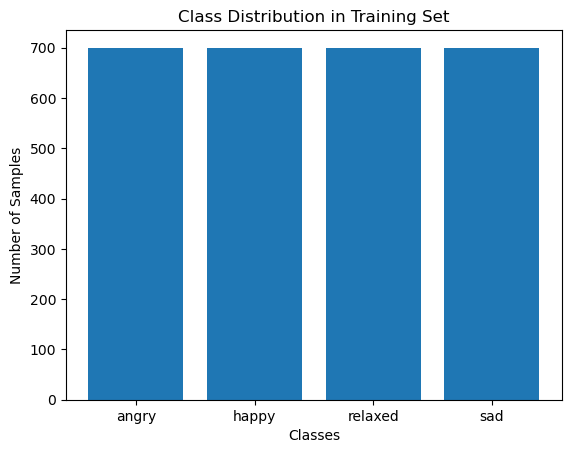

In [ ]:
print('--- Dataset size ---')
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

print('--- Classes ---')
print(f"Classes: {train_dataset.classes}")
print(f"Class-to-Index Mapping: {train_dataset.class_to_idx}")

train_labels = [label for _, label in train_dataset]
train_label_counts = Counter(train_labels)

plt.bar(train_dataset.classes, train_label_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.show()

As we can see, the class distribution is balanced

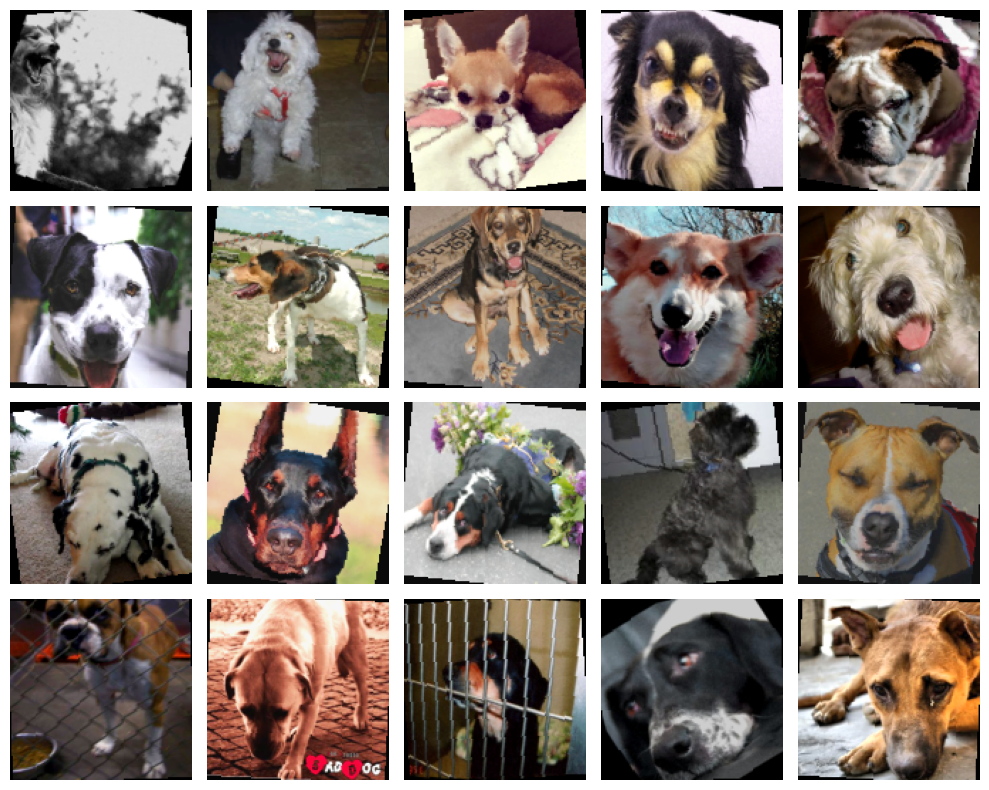

In [ ]:
#
# Some pictures of training set after transformation . . .
#

class_images = {cls: [] for cls in [0, 1, 2, 3]}
num_classes = 4
num_samples = 5
mus_torch = torch.tensor(mus).view(3, 1, 1)
sigmas_torch = torch.tensor(sigmas).view(3, 1, 1)

# Take the sample images
for images, labels in train_loader:
    for img, label in zip(images, labels):
        label = label.item()  # Convert label to int
        if len(class_images[label]) < 5:
            class_images[label].append(img)

    if all(len(images) == num_samples for images in class_images.values()):
        break


fig, axes = plt.subplots(num_classes, num_samples, figsize=(num_samples * 2, num_classes * 2))
for cls in range(num_classes):
    for sample_idx in range(num_samples):
        ax = axes[cls, sample_idx]
        img = class_images[cls][sample_idx] * sigmas_torch + mus_torch
        img = torch.clamp(img, 0, 1)
        ax.imshow(img.permute(1, 2, 0).numpy())
        ax.axis('off')
        if sample_idx == 0:
            ax.set_ylabel(f"Class {cls}", fontsize=12)
plt.tight_layout()
plt.show()

## 2)

In [11]:
cnn = CNN()

if torch.cuda.is_available():
    cnn = cnn.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate, weight_decay=decay)

# Reducing step a bit after A WHILE
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.8)

print('Number of parameters: ', sum(param.numel() for param in cnn.parameters()))

Number of parameters:  100116


In [ ]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

best_val_accuracy = 0
best_val_model_weights = None

best_test_accuracy = 0
best_test_model_weights = None
# save_interval = 5

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0

    # Training phase
    cnn.train()
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        # Forward + Backward + Optimize
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss and accuracy for training
        running_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()

    # Compute training metrics
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct_train / total_train

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation phase
    cnn.eval()
    running_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            outputs = cnn(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            predicted = torch.argmax(outputs, dim=1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Compute validation metrics
    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_accuracy = 100 * correct_val / total_val

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    # Track the best model with highest val accuracy
    if epoch_val_accuracy > best_val_accuracy:
        best_val_accuracy = epoch_val_accuracy
        best_val_model_weights = cnn.state_dict()

        torch.save(best_val_model_weights, project_path + 'ML2/HW1/models/best_val_model.pkl')
        print(f'Best Val Model Saved at Epoch {epoch+1} with Val Accuracy: {best_val_accuracy:.3f}%')

    # Print epoch results
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.3f}, Train Accuracy: {epoch_train_accuracy:.3f}%')
    print(f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {epoch_val_loss:.3f}, Val Accuracy: {epoch_val_accuracy:.3f}%')

    # Checking test every couple of epochs or so to see whats up
    if epoch >= 200 and epoch % 5 == 0:
        cnn.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = images.cuda()
                    labels = labels.cuda()

                outputs = cnn(images)
                predicted = torch.argmax(outputs, dim=1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test

        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_test_model_weights = cnn.state_dict()

            torch.save(best_test_model_weights, project_path + 'ML2/HW1/models/best_test_model.pkl')
            print(f'Best Test Model Saved at Epoch {epoch+1} with Test Accuracy: {best_test_accuracy:.3f}%')

        print(f'Test Accuracy at Epoch {epoch+1}: {test_accuracy:.3f}%')

Best Val Model Saved at Epoch 1 with Val Accuracy: 30.000%
Epoch [1/300], Train Loss: 1.370, Train Accuracy: 28.643%
Epoch [1/300], Val Loss: 1.359, Val Accuracy: 30.000%
Epoch [2/300], Train Loss: 1.353, Train Accuracy: 31.071%
Epoch [2/300], Val Loss: 1.356, Val Accuracy: 29.750%
Best Val Model Saved at Epoch 3 with Val Accuracy: 31.000%
Epoch [3/300], Train Loss: 1.340, Train Accuracy: 32.929%
Epoch [3/300], Val Loss: 1.337, Val Accuracy: 31.000%
Best Val Model Saved at Epoch 4 with Val Accuracy: 32.250%
Epoch [4/300], Train Loss: 1.325, Train Accuracy: 34.179%
Epoch [4/300], Val Loss: 1.333, Val Accuracy: 32.250%
Best Val Model Saved at Epoch 5 with Val Accuracy: 32.500%
Epoch [5/300], Train Loss: 1.315, Train Accuracy: 33.286%
Epoch [5/300], Val Loss: 1.323, Val Accuracy: 32.500%
Best Val Model Saved at Epoch 6 with Val Accuracy: 33.000%
Epoch [6/300], Train Loss: 1.320, Train Accuracy: 33.286%
Epoch [6/300], Val Loss: 1.318, Val Accuracy: 33.000%
Epoch [7/300], Train Loss: 1.310,

In [ ]:
# Saving model
i = 1
base_filename = project_path + 'ML2/HW1/models/cnn'
filename = f'{base_filename}.pkl'

while os.path.exists(filename):
    filename = f"{base_filename}_{i}.pkl"
    i += 1

torch.save(cnn.state_dict(), filename)

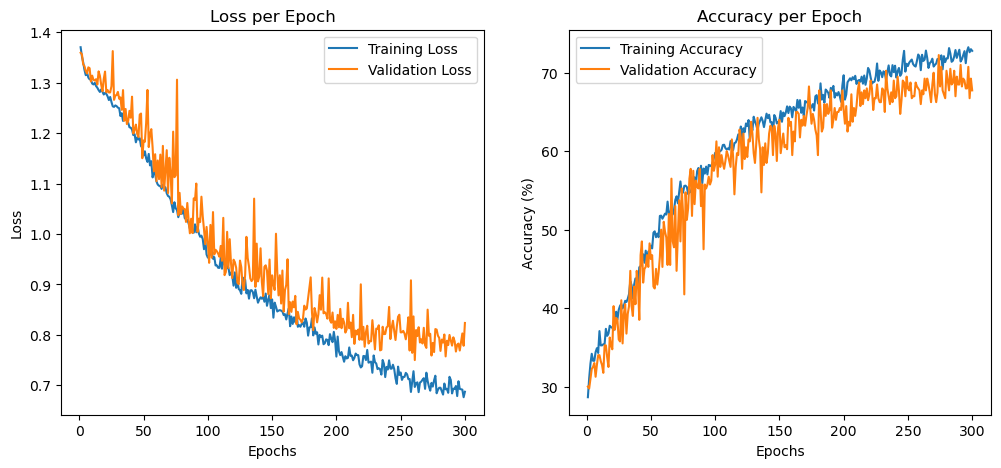

In [ ]:
epochs = range(1, num_epochs+1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

## 3)

In [7]:
# Loading the best validation model
# This is the one we've taken at the end

state_dict = torch.load(r'C:\Users\yumif\Desktop\projects\machine_learning_hw\ML2\HW1_FINAL\HW1_Q3_337604821_340915156.pkl')

In [12]:
cnn.load_state_dict(state_dict)

<All keys matched successfully>

In [13]:
cnn.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = cnn(images)

        loss = criterion(outputs, labels)
        test_loss += loss.item()  # Accumulate the test loss

        predicted = torch.argmax(outputs, dim=1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

average_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"Test Loss: {average_test_loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}%")

Test Loss: 0.858
Test Accuracy: 67.875%


## 4)

Through extensive trial and error, we've designed a cnn model that progressively increases the number of channels while incorporating dropout and activation functions such as Leaky ReLU and SiLU to enhance generalization and performance. The extracted features are processed through an adaptive average pooling layer, followed by fully connected layers for final classification.

After training the model for 300 epochs, we took the best model based on validation set. We've achieved a test accuracy of 67.875% with only 100,116 parameters.

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the <code>hw1_data/birds</code> folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the <code>hw1_data/dogs</code> folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
from PIL import Image

## 1.

In [ ]:
vgg16 = models.vgg16(pretrained=True, progress=True)
vgg16.eval()

if torch.cuda.is_available():
    vgg16 = vgg16.cuda()

C:\Users\yumif\anaconda3\envs\genenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\yumif\anaconda3\envs\genenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\yumif/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:25<00:00, 21.7MB/s] 


## 2.

In [ ]:
birds_path = project_path + '/ML2/HW1/hw1_data/birds/'

image_0 = Image.open(birds_path + 'bird_0.jpg').convert('RGB')
image_1 = Image.open(birds_path + 'bird_1.jpg').convert('RGB')

images = [image_0, image_1]

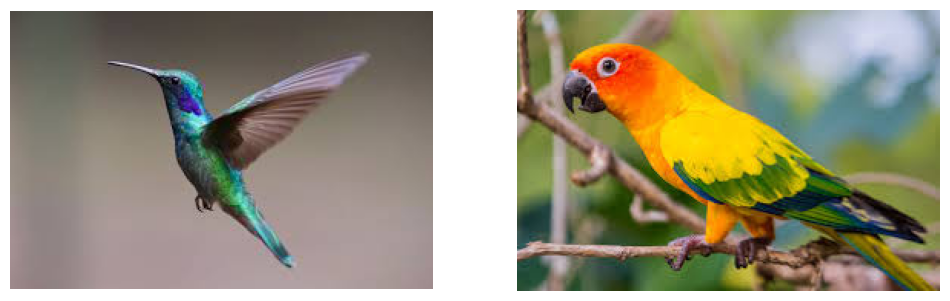

In [ ]:
fig, axes = plt.subplots(1, len(images), figsize=(12, 4))

for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## 3.

We've resized images to 224x224, and then normalized them accordingly

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transformed_images = torch.stack([transform(img) for img in images])

## 4.

In [ ]:
with torch.no_grad():
    outputs = vgg16(transformed_images)

The outputs are raw scores for each class (1000 classes total) for each of the two images

In [ ]:
print(outputs.shape)
print(outputs)

torch.Size([2, 1000])
tensor([[ 1.5175,  4.2852,  2.7133,  ...,  0.5375,  4.9361, -1.3509],
        [ 0.8642,  5.0238, -0.9463,  ...,  0.6321,  4.5410, -1.8296]])


We can compute probabilities with softmax and get top k indices of classes.

Overall, it seems like vgg16 predicted similar classes for the images (they are both birds, after all)

In [ ]:
probs = nn.functional.softmax(outputs, dim=1)
_, top5_indices = torch.topk(probs, 5)

In [ ]:
print(top5_indices)

tensor([[ 94,  95,  92,  84, 128],
        [ 90,  88,  11,  92,  95]])


## 5.

In [ ]:
dog_path = project_path + 'ML2/HW1/hw1_data/dogs/dog_7.jpg'
dog_image = Image.open(dog_path).convert('RGB')

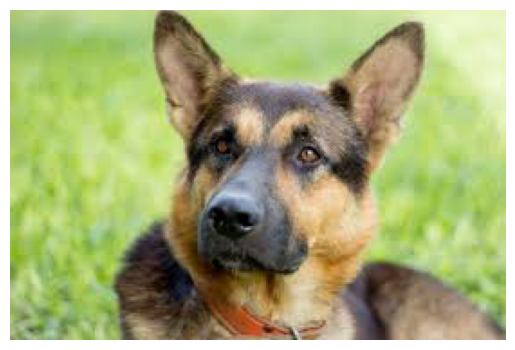

In [ ]:
plt.imshow(dog_image)
plt.axis('off')
plt.show()

In [ ]:
dog_transformed = torch.stack([transform(dog_image)])

with torch.no_grad():
    output = vgg16(dog_transformed)

Again, the outputs are raw scores for each class

In [ ]:
print(output.shape)
print(output)

torch.Size([1, 1000])
tensor([[ 4.0035e-01, -4.1130e+00,  4.9246e-02, -1.8518e+00, -2.9120e+00,
         -8.6880e-01, -3.5274e+00, -1.2696e+00,  3.6082e-01, -2.4375e+00,
          2.5472e-01, -2.6453e+00, -3.2328e+00, -1.7111e+00, -2.6212e+00,
         -1.5648e+00, -2.2126e+00, -2.0455e+00, -2.3517e+00, -3.4826e+00,
         -2.5599e+00, -7.5499e-01, -3.0126e+00, -2.5906e+00, -3.2965e+00,
          1.1103e+00,  5.4938e-02, -1.1802e+00, -5.2863e-03, -3.5758e+00,
         -1.3560e+00, -2.6722e+00, -2.6543e-01, -8.0850e-01, -3.1780e-01,
         -1.2984e-01,  3.3015e-01, -3.4683e-01, -3.7454e+00, -3.1020e+00,
         -3.7873e+00, -1.7079e+00, -3.0208e+00, -1.7253e+00, -3.7442e+00,
         -2.6757e+00, -4.3063e+00, -2.0166e+00, -4.0280e+00, -9.0577e-01,
         -1.4152e+00,  7.7519e-01, -8.5202e-01, -9.1757e-01, -1.2209e+00,
         -3.6901e+00, -2.2970e+00, -1.0446e+00, -2.8337e+00, -9.3002e-01,
         -6.7811e-01, -5.8468e-01,  2.2858e+00,  7.8846e-02, -1.4821e+00,
          5.8840

Again, we can compute probabilities with softmax and get top k indices of classes.

This time model predicted completely different top 5 classes compared to the bird images.

In [ ]:
probs = nn.functional.softmax(output, dim=1)
_, top5_indices = torch.topk(probs, 5)

In [ ]:
print(top5_indices)

tensor([[235, 227, 225, 174, 273]])


## 6.

In [ ]:
with torch.no_grad():
    feature_maps = vgg16.features[0](dog_transformed)

In [ ]:
feature_maps.shape

torch.Size([1, 64, 224, 224])

In [ ]:
feature_maps = feature_maps[0, :3, :, :]

As we can see, each filter seems to accent on different details of the image

* The first one seems to show rough and distinct edges

* The second shows slightly more complex features, like contours and textures

* The third filter shows even more finer details of dogs' silhouette and form

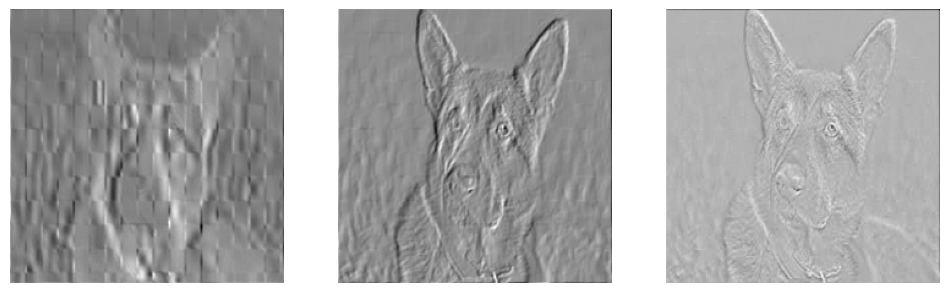

In [ ]:
fig, axes = plt.subplots(1, len(feature_maps), figsize=(12, 4))

for i, map in enumerate(feature_maps):
    axes[i].imshow(map, cmap='gray')
    axes[i].axis('off')

plt.show()